# Trabalho Final IA
Renata Moura Barreto

Para os algoritmos rodarem é preciso rodar um por vez

#**Bibliotecas**

In [ ]:
#bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from ast import literal_eval
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import linear_kernel
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

%matplotlib inline

#Leitura do Dataset

In [ ]:
#leitura dos datasets
recipes = pd.read_csv('/content/drive/MyDrive/ia/RAW_recipes.csv')

# Análise dos Dados

In [ ]:
#vendo as primeiras receitas
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
#análise das informações do dataset

print(recipes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
None


,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


#Manipulando Dados

In [ ]:
#retirando as receitas que não são vegetarianas ou veganas

veg = ['vegetarian', 'vegan']

df = recipes[recipes['tags'].str.contains('|'.join(veg))]

In [ ]:
#analisando as receitas que sobraram
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35651 entries, 0 to 231633
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            35651 non-null  object
 1   id              35651 non-null  int64 
 2   minutes         35651 non-null  int64 
 3   contributor_id  35651 non-null  int64 
 4   submitted       35651 non-null  object
 5   tags            35651 non-null  object
 6   nutrition       35651 non-null  object
 7   n_steps         35651 non-null  int64 
 8   steps           35651 non-null  object
 9   description     35021 non-null  object
 10  ingredients     35651 non-null  object
 11  n_ingredients   35651 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 3.5+ MB
None


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
16,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5
19,cream of cauliflower soup vegan,23850,110,3288,2002-03-28,"['lactose', 'weeknight', 'time-to-make', 'cour...","[174.2, 4.0, 24.0, 1.0, 15.0, 1.0, 10.0]",10,['heat the oil or margarine in a soup pot and ...,this is a dairy free,"['canola oil', 'onion', 'garlic', 'cauliflower...",16


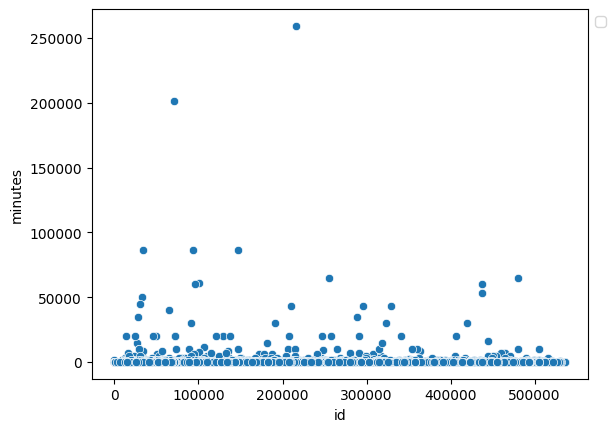

In [ ]:
#análise dos minutos

sns.scatterplot(x='id', y='minutes', data= df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [ ]:
#retirando as receitas que demoram mais de um dia para serem feitas

df = df.query('minutes < 1440')

In [ ]:
#vendo as receitas que sobraram
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35323 entries, 0 to 231633
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            35323 non-null  object
 1   id              35323 non-null  int64 
 2   minutes         35323 non-null  int64 
 3   contributor_id  35323 non-null  int64 
 4   submitted       35323 non-null  object
 5   tags            35323 non-null  object
 6   nutrition       35323 non-null  object
 7   n_steps         35323 non-null  int64 
 8   steps           35323 non-null  object
 9   description     34696 non-null  object
 10  ingredients     35323 non-null  object
 11  n_ingredients   35323 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 3.5+ MB
None


# **Input**


In [ ]:
#input para saber o nome do usuário
name = input("Hello, my name is Vegia. I'm here to help you make delicious recipes. What's your name? ")

Hello, my name is Vegia. I'm here to help you make delicious recipes. What's your name? guida


In [ ]:
#input para saber os ingredientes do usuário

user_ingredients = []

print(f"Welcome {name}! Enter the ingredients you have, separated by commas: ")

user_input = input("Example:\nbanana,apple,lemon\n")

user_ingredients.extend(user_input.split(','))

print("List of ingredients:", user_ingredients)


Welcome guida! Enter the ingredients you have, separated by commas: 
Example:
banana,apple,lemon
potato,broccoli
List of ingredients: ['potato', 'broccoli']


#**Algoritmos de recomendação**

##KNN

In [ ]:
#tempo de início
start_time = time.time()

# início do vetorizador TF-IDF
# min_df=1-> inclui todos os ingredientes
# stop_words=None -> não remove stop words
vectorizer = TfidfVectorizer(min_df=1, stop_words=None)

#fit_transform -> transforma a lista de ingredientes em uma matriz TF-IDF
matrix = vectorizer.fit_transform(df['ingredients'])

# vizinhos = 5
# método =  "força bruta" para encontrar os vizinhos mais próximos.
# métrica= distâncias dos cossenos
knn_model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')

#ajuste
knn_model.fit(matrix)

#transforma os ingredientes em um vetor TF-IDF
vector = vectorizer.transform([' '.join(user_ingredients)])

#kneighbors -> procura os vizinhos mais próximos
distances, indices = knn_model.kneighbors(vector)

#tempo final
end_time = time.time()

#impressão das receitas
print("Recipes:")
for i, idx in enumerate(indices.flatten()):
    recipe_info = df.iloc[idx]
    print(f"\n{i + 1}. Name: {recipe_info['name']}")
    print(f"⟶ Cooking time: {recipe_info['minutes']} minutes")
    print("⟶ Ingredients:")
    print(f"   {recipe_info['ingredients']}")
    print("⟶ Steps:")
    print(f"   {recipe_info['steps']}\n")
    print("-"*40)

Recipes:

1. Name: greatest chips  french fries  on earth
⟶ Cooking time: 85 minutes
⟶ Ingredients:
   ['potato', 'oil']
⟶ Steps:
   ['fill a saucepan with plenty of water and bring up the water temperature to 62c', 'i found on my electric stove top that medium was a good temperature to start with and as it approached dropping back to low held it there', 'peel potato and cut into chips', "i think around 12mm across is a good size , the recipe wouldn't be well suited to thin ones", 'pre-cook in water at 62c for 30 minutes , drain well and allow to cool to room temperature', 'deep-fry in warm oil at 130c for 5 minutes , drain and allow to cool to room temperature', 'deep-fry in hot oil at 190c until golden and done to your liking , around 5 minutes', "if doing a lot of chips either cook in small batches or crank up the burner if using a wok when adding so the temperature of the oil doesn't drop too much"]

----------------------------------------

2. Name: very easy hash brown
⟶ Cooking 

In [ ]:
#calculo do tempo de execução
total_time = end_time - start_time

print(f"Execution time: {total_time} seconds")


Execution time: 0.6030652523040771 seconds


##Processamento de linguagem natural e medidas de similaridade



In [ ]:
start_time = time.time()

# cria matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['ingredients'].apply(lambda x: ' '.join(eval(x))))

# representação TF-IDF
user_tfidf = vectorizer.transform([' '.join(user_ingredients)])

# calculo da similaridade de Jaccard entre os ingredientes do usuário e as receitas
cosine_similarities = linear_kernel(user_tfidf, tfidf_matrix).flatten()

# índices das receitas mais similares
recipe_indices = cosine_similarities.argsort()[:-6:-1]
end_time = time.time()

# impressão
print("\nRecipes:")
for idx in recipe_indices:
    print(df['name'].iloc[idx])



Suggested Recipes:
the way too simple salad for the lazy calorie counter
basic salad mix  salad spinner
salad greens and mustard vinaigrette
chopped blue cheese salad
tasty topping for burgers


In [ ]:
total_time = end_time - start_time

print(f"Tempo decorrido: {total_time} segundos")

Tempo decorrido: 2.458923101425171 segundos


##tentativa de rede neural

In [ ]:
start_time = time.time()
#strings de ingredientes em listas de palavras
list_ingredients = df['ingredients'].apply(lambda x: eval(x))

#treina um modelo Word2Vec na lista de ingredientes
word2vec_model = Word2Vec(sentences= list_ingredients, vector_size=100, window=5, min_count=1, workers=4)

# calculaa o vetor médio dos ingredientes de uma receita
def get_vector(recipe_ingredients):
    vectors = [word2vec_model.wv[word] for word in recipe_ingredients if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# chama a função "get_vector" para as listas de ingredientes
# salva coluna chamada "recipe_vector"
df['recipe_vector'] = list_ingredients.apply(get_vector)

#chama a a função get_vector e cria um vetor médio para os ingredientes do usuário
user_vector = get_vector(user_ingredients)

# rede neural sequencial
#camada 1: entrada com 100 neurônios
#camada 2: 50 neurônios
#camada 3:1 neurônio usando a função de ativação sigmoid(normaliza a saída entre 0 e 1)
model = Sequential([
    Dense(100, input_dim=word2vec_model.vector_size, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compila o modelo: otimizador = adam e  função de perda
model.compile(optimizer='adam', loss='binary_crossentropy')

# treina o modelo com 10 épocas usando os vetores de receitas
#usa similaridade de cosseno com os ingredientes do usuário
X_train = np.vstack(df['recipe_vector'])
y_train = cosine_similarity(X_train, [user_vector]).flatten()
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

#calcula a similaridade entre os ingredientes do usuário e as receitas
user_similarity = model.predict(user_vector.reshape(1, -1))

# classifica de acordo com "user_similarity"
#seleciona as 5 receitas mais similares
df['user_similarity'] = model.predict(np.vstack(df['recipe_vector']))
top_recipes = df.sort_values(by='user_similarity', ascending=False).head(5)
end_time = time.time()

print("\nRecipes:")

for _, row in top_recipes.iterrows():
    print(f"\nName: {row['name']}")
    print(f"⟶ Cooking time:{row['minutes']} minutes")
    print(f"⟶ Number of Ingredients:{row['n_ingredients']} ingredients")
    print("⟶ Ingredients:\n   ", row['ingredients'])
    print(f"⟶ Steps:\n  {row['steps']}\n")
    print("-" * 40)


1104/1104 [==============================] - 2s 1ms/step

Recipes:

monterey jack queso  fiesta corn

okonomiyaki  japanese pizza

vegetarian cabbage rolls

muffins   a vegetable medley

vegetarian shepard s pie

Name: monterey jack queso  fiesta corn
⟶ Cooking time:35 minutes
⟶ Number of Ingredients:10 ingredients
⟶ Ingredients:
    ['frozen corn', 'margarine', 'flour', 'sugar', 'green pepper', 'red pepper', 'monterey jack queso dip', 'pimento-stuffed green olives', 'pam cooking spray', 'plain doritos']
⟶ Steps:
  ['preheat oven 375', 'in mixing bowl , corn , margarine , flour , sugar and additional green and red peppers if desired', ')stir in monterey jack queso dip and sliced green olives', 'pour into 1 1 / 2 greased casserole', 'top with crushed dorito chips', 'bake uncovered 20 to 25 minutes', 'add two more tablspoon of monterey jack cheese queso dip and stir in before serving if you want it more creamy']

----------------------------------------

Name: okonomiyaki  japanese pizza

In [ ]:
total_time = end_time - start_time

print(f"Tempo decorrido: {total_time} segundos")

Tempo decorrido: 30.949270486831665 segundos
